In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('measurements.csv') 


In [3]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


## Cleaning

#### First let's rename the columns in the case snake formart 

In [4]:
df.columns=[e.lower().replace(' ', '_') for e in df.columns]


In [5]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


#### Now let's take a look at the missing values

In [6]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

The columns 'refill_liters' and 'refill_gas' haver too many missing values so we drop them.

In [7]:
drop_list = ['refill_liters', 'refill_gas']

In [8]:
df.specials.value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

We can see that 'AC', 'rain' and 'sun' are already in a different column so we keep only those and drop this one.

In [9]:
drop_list.append('specials')


In [10]:
df = df.drop(drop_list, axis=1)


In [11]:
df.temp_inside.value_counts(dropna=False)

21,5    133
22      102
22,5     59
20       25
21       13
23       13
NaN      12
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

In [12]:
df.temp_inside.dtypes

dtype('O')

We change the type of 'temp_inside' column into float, then we calculate the mean and replace the NaN values by the nearest 0.5 rounding.


In [13]:
df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype(float)


In [14]:
np.mean(df.temp_inside)

21.929521276595743

In [15]:
df.temp_inside = df.temp_inside.fillna(22)

In [16]:
df.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

### Columns types 

In [17]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
ac                int64
rain              int64
sun               int64
dtype: object

The columns 'distance' and 'consume' should be float and not sting so we change it.

In [18]:
df[['distance', 'consume']] = df[['distance', 'consume']].apply(lambda x: x.str.replace(',', '.')).astype(float)


In [19]:
df.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
ac                int64
rain              int64
sun               int64
dtype: object

In [20]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [21]:
df.to_csv('df.csv', index=False)


# Analysis

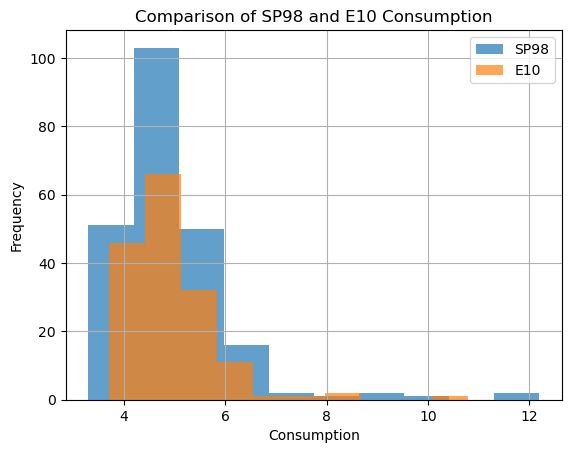

In [35]:
cole10 = df[df['gas_type'] == 'E10']
col98 = df[df['gas_type'] == 'SP98']


plt.hist(col98['consume'], label='SP98', alpha=0.7, bins=20)
plt.hist(cole10['consume'], label='E10', alpha=0.7, bins=20)
plt.title('Comparison of SP98 and E10 consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



### Here we can see that SP98 comsumes generally more than E10.

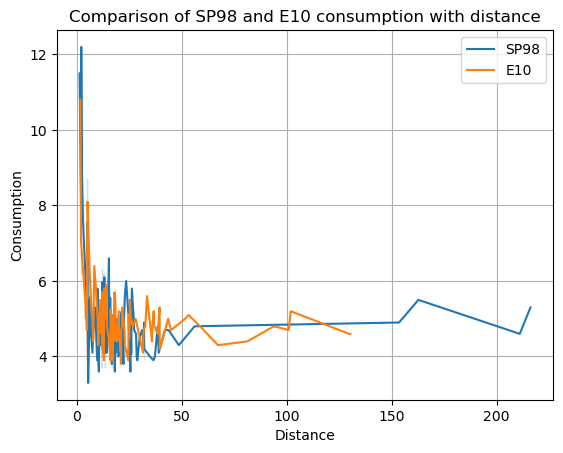

In [38]:
cole10 = df[df['gas_type'] == 'E10']
col98 = df[df['gas_type'] == 'SP98']

ax1 = sns.lineplot(data=col98, x=col98["distance"], y=col98["consume"], label = 'SP98')
ax2 = sns.lineplot(data=cole10, x=cole10["distance"], y=cole10["consume"], label = 'E10')
plt.title('Comparison of SP98 and E10 consumption with distance')
plt.xlabel('Distance')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

### Here we can see that SP98 tends to consume more fuel on journeys between 60 and 100km.

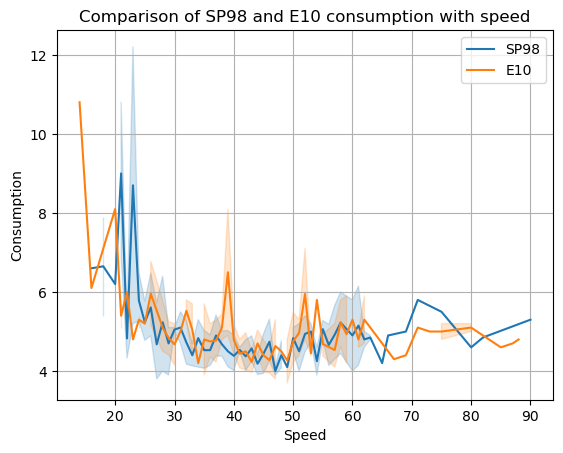

In [36]:
cole10 = df[df['gas_type'] == 'E10']
col98 = df[df['gas_type'] == 'SP98']

ax1 = sns.lineplot(data=col98, x=col98["speed"], y=col98["consume"], label = 'SP98')
ax2 = sns.lineplot(data=cole10, x=cole10["speed"], y=cole10["consume"], label = 'E10')
plt.title('Comparison of SP98 and E10 consumption with speed')
plt.xlabel('Speed')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

### Here we can see that for a speed over 65km/h, SP98 consumes more than E10. We could recommand to use E10 for trip out of the city.

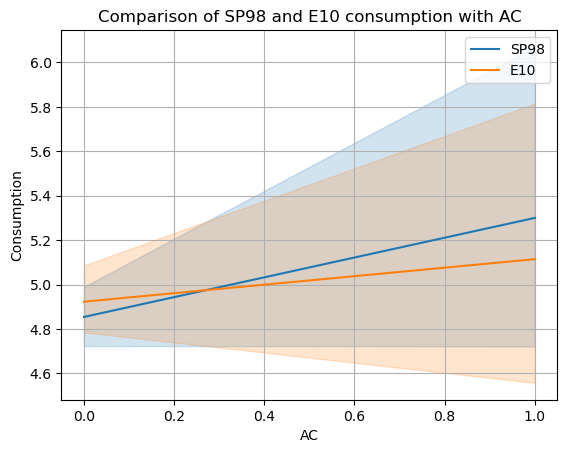

In [37]:
cole10 = df[df['gas_type'] == 'E10']
col98 = df[df['gas_type'] == 'SP98']

ax1 = sns.lineplot(data=col98, x=col98["ac"], y=col98["consume"], label = 'SP98')
ax2 = sns.lineplot(data=cole10, x=cole10["ac"], y=cole10["consume"], label = 'E10')
plt.title('Comparison of SP98 and E10 consumption with AC')
plt.xlabel('AC')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

### Here we can see that the use of AC increase more the consumption of SP98 than E10. During periods of high temperatures, when people tend to turn on the air conditioning, it's preferable to use E10.


## To sum up, it's better to use E10 than SP98 because it consumes less fuel, especially on longer journeys and at higher speeds. It also consumes less fuel when the air conditioning is on, and is generally cheaper than SP98.

# Predictions

We want to predict the consumption depending on certain features so the column 'consume' will be our target y.

In [4]:
df = pd.read_csv('df.csv') 

In [5]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [6]:
# X/y split (feature/target)
y = df['consume']
X = df.drop(['consume'], axis=1)

# train/test split   
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# num/cat split  
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

# fit and run transformer on X_train_num
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

# run same transformer on X_test_num
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)

# fit and run encoder on X_train_cat
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols) 

# run same encoder on X_test_cat
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns) 
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols) 

# concat X_train_norm and X_train_encode : X_train_transformed
X_train_transformed = np.concatenate([X_train_norm, X_train_encode], axis=1)

# concat X_test_normalized and X_test_encoded : X_test_transformed
X_test_transformed = np.concatenate([X_test_norm, X_test_encode], axis=1)


### Now we apply the linear regression

In [7]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_transformed,y_train)

LinearRegression()

Now we check the r2 score

In [8]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_test_transformed)
r2_score(y_test, predictions)

0.09412310938686286

The r2 score is very low so the model is not good, let's check with the cross validation.

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(lm, X_train_transformed, y_train, cv=10,scoring='r2')
print(cross_val_scores)
np.mean(cross_val_scores)

[ 0.24441106 -0.20705763  0.2798454   0.1047914   0.06715504  0.17533447
  0.14812509  0.01578055 -0.05929485  0.15974025]


0.09288307865681143

### Let's see if we can select certain features with a correlation matrix

<Axes: >

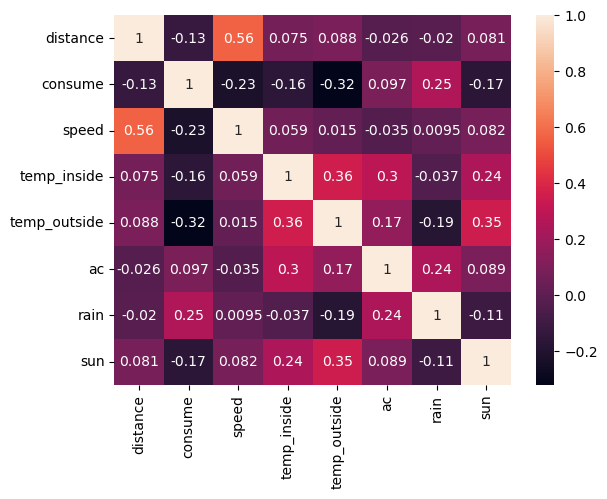

In [15]:
correlations_matrix = df.corr()
sns.heatmap(correlations_matrix, annot=True)


The columns 'temp_inside', 'temp_outside', 'sun' are correlated to some other features but not that much with our target so we drop them.

In [16]:
# X/y split (feature/target)
y = df['consume']
X = df.drop(['consume', 'temp_inside', 'temp_outside', 'sun'], axis=1)

# train/test split   
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# num/cat split  
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

# fit and run transformer on X_train_num
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

# run same transformer on X_test_num
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)

# fit and run encoder on X_train_cat
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols) 

# run same encoder on X_test_cat
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns) 
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols) 

# concat X_train_norm and X_train_encode : X_train_transformed
X_train_transformed = np.concatenate([X_train_norm, X_train_encode], axis=1)

# concat X_test_normalized and X_test_encoded : X_test_transformed
X_test_transformed = np.concatenate([X_test_norm, X_test_encode], axis=1)


In [17]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_transformed,y_train)

LinearRegression()

In [18]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_test_transformed)
r2_score(y_test, predictions)

0.030695176081834807

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(lm, X_train_transformed, y_train, cv=10,scoring='r2')
print(cross_val_scores)
np.mean(cross_val_scores)

[ 0.22270052 -0.297993    0.2939607   0.0409116   0.07527051 -0.04806997
  0.08819222 -0.12610957 -0.27733868 -0.12836924]


-0.015684491893869855

The model is even worse.

In [29]:
df.gas_type = np.where(df.gas_type.isin(['E10']),0,1)


### Now let's see if we get a better result when we use the RFE feature selection method 

In [31]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0,0
384,16.1,4.3,38,25.0,31,1,1,0,0
385,16.0,3.8,45,25.0,19,1,0,0,0
386,15.4,4.6,42,25.0,31,1,1,0,0


In [32]:
# X/y split (feature/target)
y = df['consume']
X = df.drop(['consume'], axis=1)

# train/test split   
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# num/cat split  
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

# fit and run transformer on X_train_num
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

# run same transformer on X_test_num
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)

# fit and run encoder on X_train_cat
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols) 

# run same encoder on X_test_cat
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns) 
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols) 

# concat X_train_norm and X_train_encode : X_train_transformed
X_train_transformed = np.concatenate([X_train_norm, X_train_encode], axis=1)

# concat X_test_normalized and X_test_encoded : X_test_transformed
X_test_transformed = np.concatenate([X_test_norm, X_test_encode], axis=1)


In [33]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_transformed,y_train)

LinearRegression()

In [34]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_test_transformed)
r2_score(y_test, predictions)

0.09412310938686319

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# X is your feature matrix, y is the target variable
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4)  # Adjust the number of features as needed
X_selected = rfe.fit_transform(X, y)



In [39]:
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['temp_inside', 'ac', 'rain', 'sun'], dtype='object')


In [41]:
# X/y split (feature/target)
y = df['consume']
X = df[['temp_inside', 'ac', 'rain', 'sun']]

# train/test split   
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# num/cat split  
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

# fit and run transformer on X_train_num
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

# run same transformer on X_test_num
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)

# fit and run encoder on X_train_cat
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols) 

# run same encoder on X_test_cat
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns) 
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols) 

# concat X_train_norm and X_train_encode : X_train_transformed
X_train_transformed = np.concatenate([X_train_norm, X_train_encode], axis=1)

# concat X_test_normalized and X_test_encoded : X_test_transformed
X_test_transformed = np.concatenate([X_test_norm, X_test_encode], axis=1)


In [42]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_transformed,y_train)

LinearRegression()

In [43]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_test_transformed)
r2_score(y_test, predictions)

-0.01594969371790267

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(lm, X_train_transformed, y_train, cv=10,scoring='r2')
print(cross_val_scores)
np.mean(cross_val_scores)

[ 0.29648882 -0.20642355  0.1532727   0.02710411 -0.04583184  0.3128078
  0.06825525 -0.27479822  0.26957144 -0.1015687 ]


0.04988778095035264

The score is not better. There are probably not enough records in this dataset to build a valid model.